# Deployment

### Specific Challenges in ML System

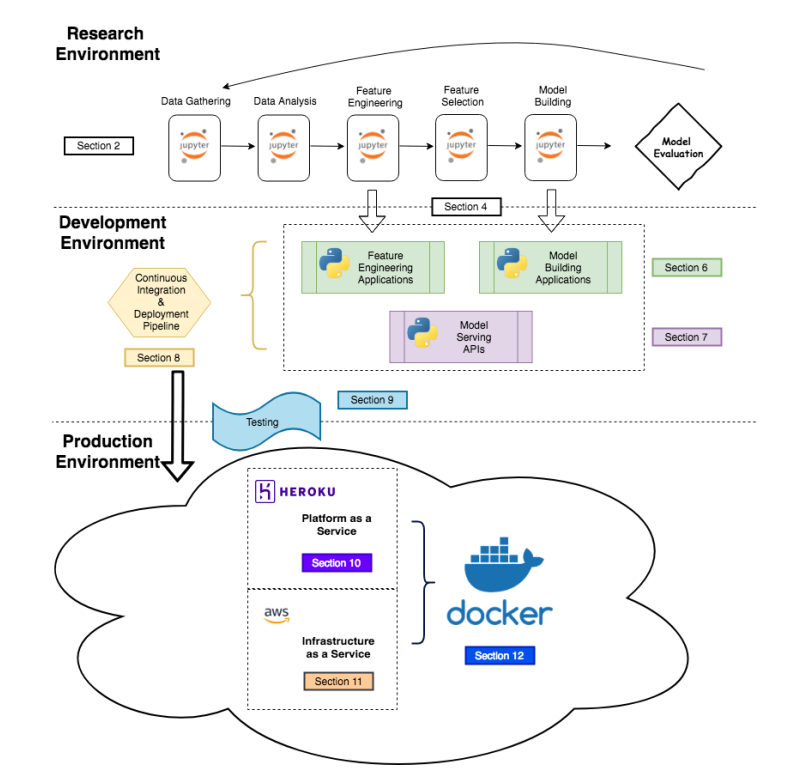
**The need for Reporducibility** The ability to duplicate ML models.

**Entaglement** If we have an input feature which we change, then the important weights of the remaining features will change as well. There we have inputs not being independent. We refer it as "Change in anything is change in everything."

**Data Dependencies** Input data changes overtime.

**Configuration Issues** Allowing configuration to be flexible.

**Data & Feature Engineering** System can run the risk of having massive amounts of supporting code written to get data into and out of expected formats. 

**Model Errors can be hard to detect with traditional tests** Solution - use differential tests.

**Separation of Expertise** Data Scientists, Software Engineers, Business people. Code is transferred between each department where no one understands whole process, This results in errors.

### General ML Architecture

**Train by Batch, Predict on Fly, Serve via REST API**

Model trained offline, loaded onto web application, that can give realtime prediction about house price when client submits house details.

**Train by Batch, predict by Batch, serve through a Shared Database**

Uploaded CSV with house input details, wait for 30 mins to receive email telling you to check mail for results.

**Train and Predict by Streaming**

Uses Spark structured Streaming and Apache Kafka.

**Train by batch, predict on Mobile**

iOs app CoML framework. Predictions can be made on the mobile device.

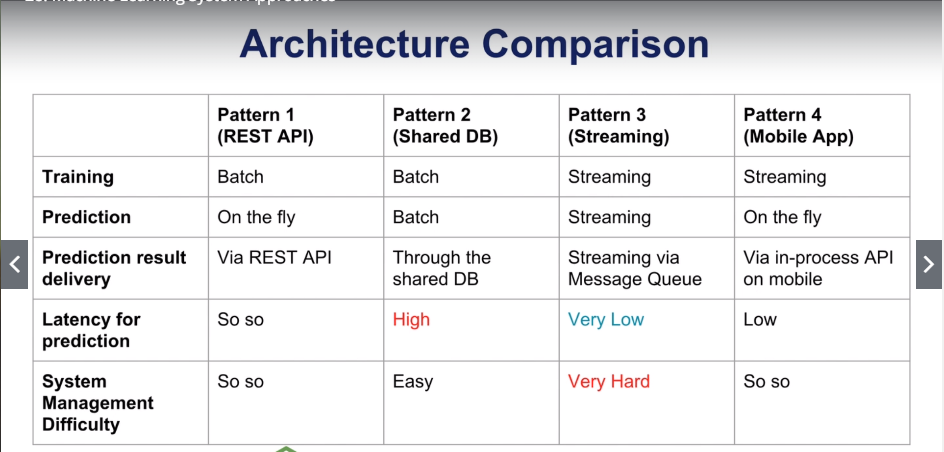

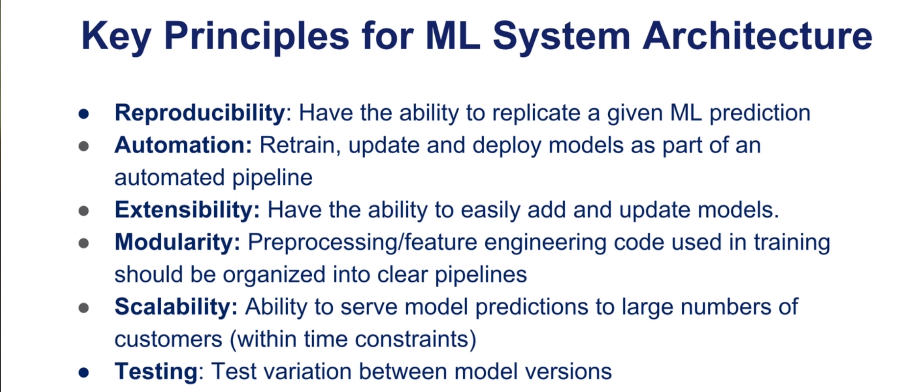

### ML Component breakdown

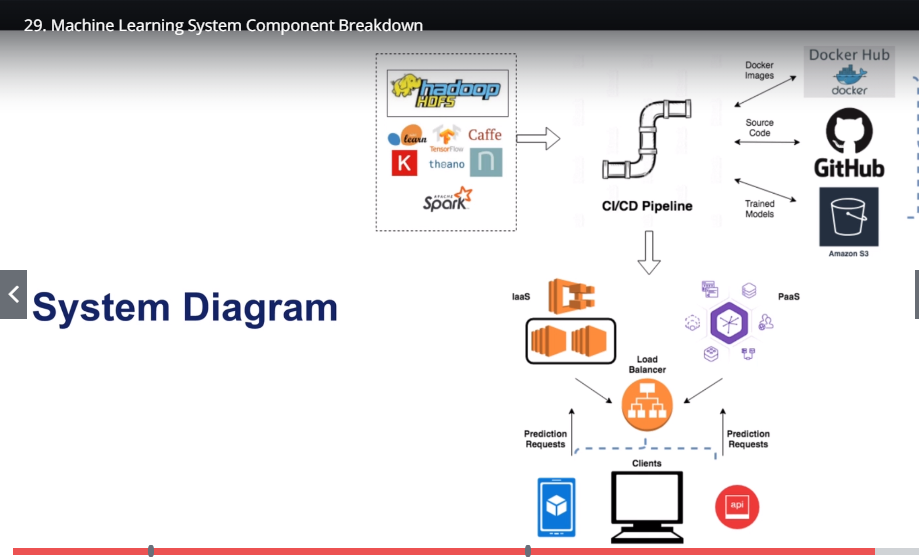

### Building a Reproducible ML pipeline

https://towardsdatascience.com/creating-reproducible-data-science-projects-1fa446369386

Reproducibility is ability to duplicate a ML model exactly, such that given the same raw data as input both models returns the same output. Lack of reproducibility results in financial and Time loss.  

We do not just deploy ML algorithms rather deploy entire ML pipeline, so we need to makesure that every single step (Data gathering, Data pre-processing, Feature Selection, Model building) of the pipeline is reproducible. 

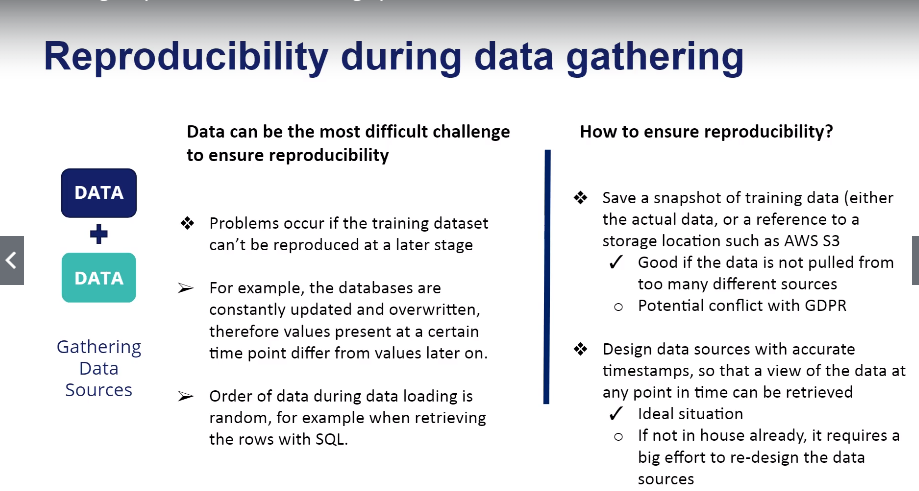

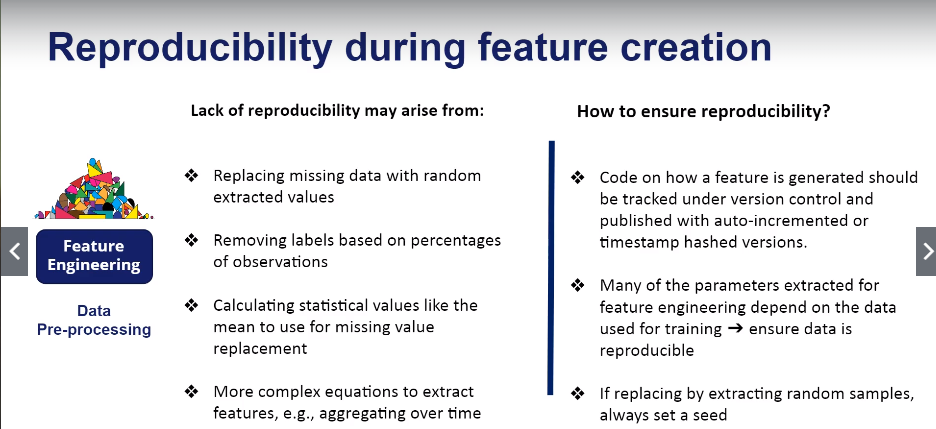

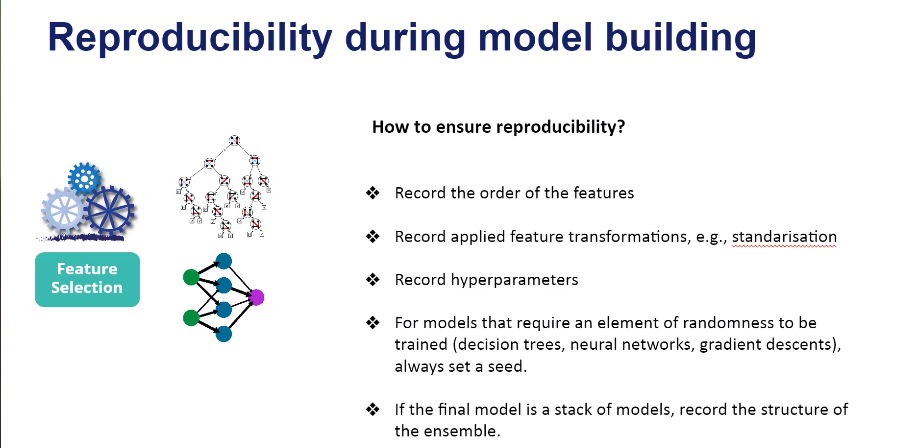

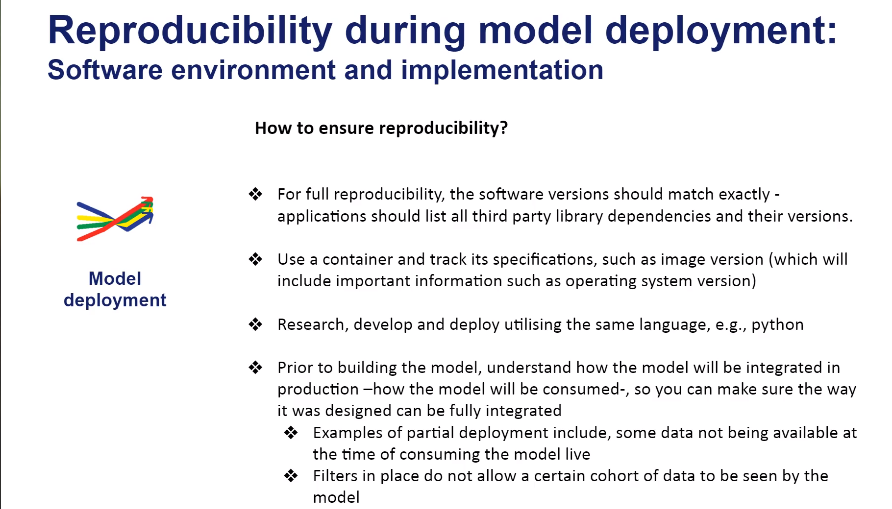

### Writing  code for ML Deployment

We need to write production code for Data preprocessing, Feature Selection and ML model building.

You will have Feature Engineering steps in Jupyter Notebook, so we need transition from Jupyter Notebook to production code for model deployment. 

You need to write production code for entire ML pipeline, specifically we want to write production code to create and transform features, select features and to build and train ML algorithms.

*we dont depoly models using Jupyter Notebok, we deploy models using Scripts*

### 3 Ways to Deploy code for ML

1. Procedural Programming --  *(Sequence of functions)*
 
2. Custom Pipeline  -- *(OOP)*

3. Third Party pipeline code -- *(OOP-Scikit Learn)* 

### Procedural Programming

In procedural programming functions are called out as sequence of computational steps. we write functions for each step. we write functions for loading data, splitting data, feature engineering, feature selection training model etc.

Then we write train script that calls all these functions to train the model.

Then we write test scriot that calls same functions on test set.

yaml file: We include yaml file with production code. yaml file contains hard coded values like file paths, hardcoded missing values like mean and mode of the variable and Feature names etc.,
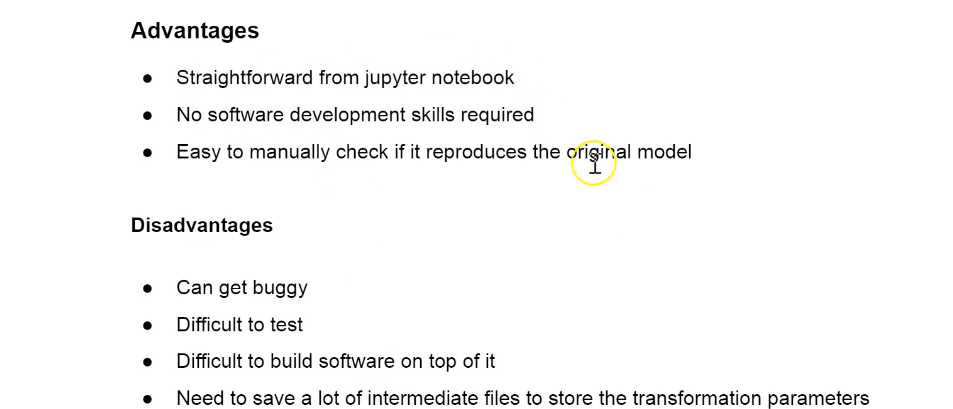

### Building Custom pipelines With Object Oriented Programming

In OOP we write code in the form of objects. The objects can store the data, and also store *Instructions or Procedures* to modify the data.

data ==> attributes

instructions or procedures ==> methods.

**Pipeline** : is a set of preporcessing steps connected in series, when typically, the output of one element is input of the next one.

The elements in the pipeline can be executed in parallel or time-sliced fashion. This is useful when we require to use big data or high computational power Ex: Neural Networks.

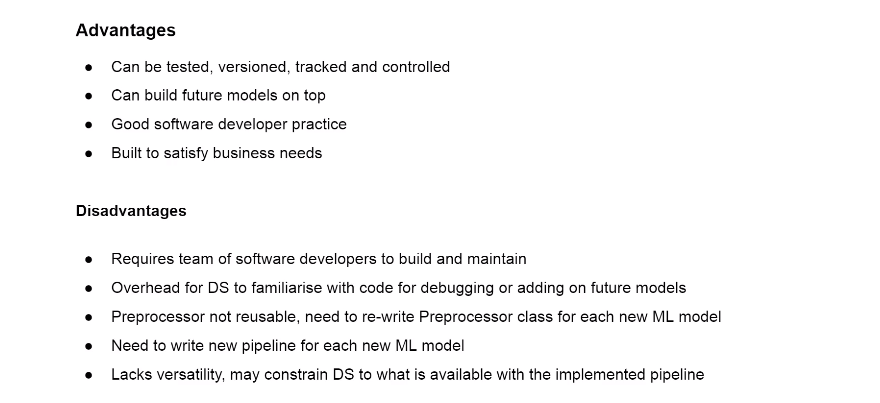

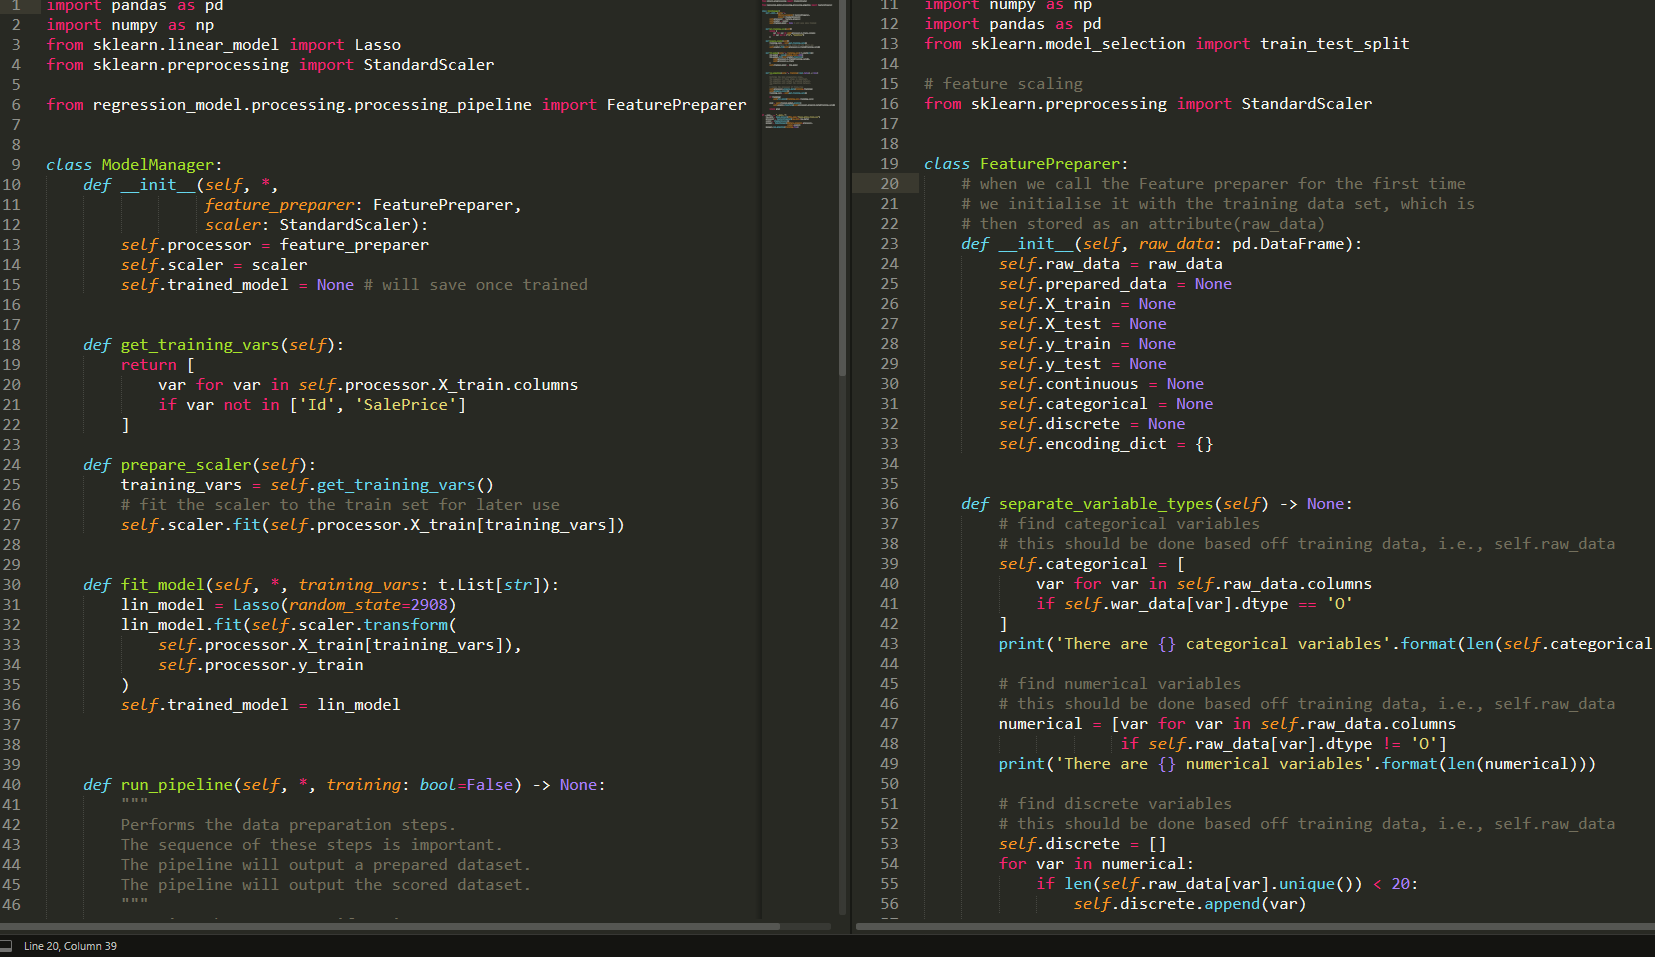

### Building pipelines with Scikit-learn Pipeline class

Scikit-learn provides solid implementation of several ML algoritms. It maintais versions of algorithms.

It provides complete documentation and if you understand the syntax for one Algorithm, switching to new one is easy.

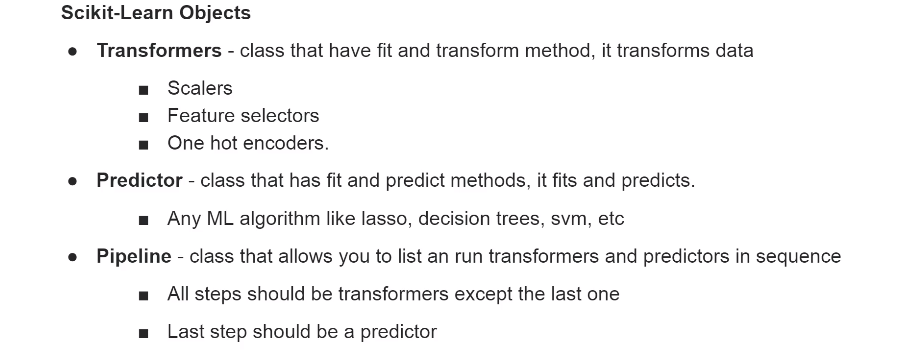

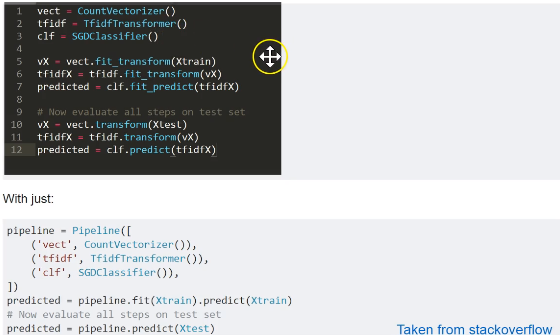

In this picture we created an object called pipeline and called pipeline class from scikit learn. Then we indicate the order of transformers we want to run.

You give a name and pass the scikit learn transformer object. 

All of the objects in pipeline need to be transformers except the last one, that can be a predictor. And you cannot put more than one predictor.

once you have your pipeline ready all you need to do is to call fit method on the training set. You can use predict method there itself to get the predictions. Or you can use testset to predict.

## Architecture Styles in Industry

https://towardsdatascience.com/being-a-data-scientist-does-not-make-you-a-software-engineer-c64081526372



## Feature Selection in CI/CD

Including feature selection algorithm as part of the pipeline,

-- Most useful features were selected,

-- Potentially avoids overfitting,

-- Enhances model interpretability.

However, If we include feature selection in CI/CD, we need to write production code to engineer all the features in the dataset, we need to write more integration and unit tests and overall more code to handle in the production environment.

**When it is suitable to include feature selection in CI/CD?**

**Suitable**

-- Model built on the same data,

-- Model build on smaller datasets.

**Not Suitable**

-- If the model is built using the dataset that has high feature space. More features means more code to engineer those features and unit & integration tests to test the code.

-- If the model is constantly adding new data sources.

-- In this case spend more time on R&D of ML and select appropriate features and then create pipeline utilising these features. 



#### How to integrate Feature selection as part of the ML pipeline in production code.

https://medium.com/onfido-tech/caspian-a-serverless-self-service-data-pipeline-using-aws-and-elk-stack-6d576f8ce369

https://medium.com/onfido-tech/continuous-delivery-for-ml-models-c1f9283aa971


You only need to add feature transformation steps right infront of the training ML models in pipeline.

Generally for feature selection we use PCA (Dimensionality Reduction). So add PCA in the pipeline steps before training steps.

If we want to apply the algorithm that is not part of the Sci-kit learn pipeline then we use the Transformermixin methods.

## Custom Transformers in Scikit-learn python

https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65

http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

http://philipmgoddard.com/modeling/sklearn_pipelines

http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

https://cloud.google.com/ml-engine/docs/scikit/custom-pipeline

We can use Inheritence and scikit-learn to write our own custom transformers and pipelines for ML preprocessing.

It helps to automate preprocessing and cleansing of data.

Scikit-learn transformers (Pipeline) are series of steps, all of them are transformers except the last one which can be either transformer or predictor (Estimator).

transformers can be anything, Normalizer, standardScaler, OneHotEncoder, LabelBinerizer etc.,

• "Transformer" transforms the input data (X) in some ways.

• "Estimator" predicts a new value (or values) (y) by using the input data (X)

Transformer and Estimator should have a fit method which can be used to learn some charateristics about data. fit(X,y). y is optional. 

Estimators have a predict(X) method which should output the predicted value of y from given x.

What if we want to create custom transformer like above and we also want it to integrate with scikit-learn's transformers. 

Scikit learn allows us to do it by creating our own custom transformers.

All Transformers and Estimators in scikit learn are implemented as python classes, each with their own attributes and methods.

*one_hot = OneHotEncoder()*

Here we are creating instance of the OneHotEncoder class. OneHotEncoder has some methods like fit(), transform(), fit_transform() and others can now be called on instance one_hot.

In order for our custom transformer to be compatible with the scikit-learn pipeline we have to implement our transformer as a class with methods like fit(), transform() and fit_transform().

#### Objects and Classes in Python

Object is simply a collection of data (variables) and methods (functions) that act on the data. And a class is a blueprint of the object. 

Object --> House

class --> Blueprint

We can create many objects from a single class. An object also called Instance of the class and the process of creating the objects is called **"Instantiation"**

### Basics to understand the Custom Transformers

#### Defining a Class in python

Like  functions begins with the word 'def', in python we define classes with keyword 'class'.

As soon as we define a class, a new class object is created with the same name. This class object allows us to access the different attributes as well as instantiate new objects of that class.

In [4]:
class MyClass:
    "This is docstring called by __doc__ method"
    a = 10 # variable
    def func(self): # method
        print('hello')

print(MyClass.a)

print(MyClass.func)

print(MyClass.__doc__)

10
<function MyClass.func at 0x0000019DC8A1F620>
This is docstring called by __doc__ method


In [6]:
# here we instantiated the class 

# class_instance is class object of MyClass class.
# by using this class_instance we can access different attributes of MyClass class

class_instance = MyClass()

print(class_instance.a)

class_instance.func()

10
hello


You may have noticed the self parameter in function definition inside the class but, we called the method simply as class_instance.func() without any arguments. It still worked.

This is because, whenever an object calls its method, the object itself is passed as the first argument. So, class_instance.func() translates into MyClass.func(class_instance).

#### Constructors in Python

\__init__() special function is called whenever a new object of the class is instantiated. 

This type of function is called "Constructor" in Object Oriented Programming (OOP). 

We normally use it to initialize all the variables.

In [7]:
class ComplexNumbers():
    def __init__(self, r=0, i=0):
        self.real = r
        self.imag = i
    
    def getData(self):
        print(f'{self.real}+{self.imag}j')

c1 = ComplexNumbers(10,15)
c1.getData()

10+15j


In [9]:
c2 = ComplexNumbers(5)

# creating attribute of the object on the fly.
c2.attr = 100
c2.real, c2.imag, c2.attr

(5, 0, 100)

in the above code we have two functions \__init()__ and getData(). \__init__() used to initialize the variables and getData() used to disply numbers properly.

We can create attributes of an object on the fly. We created new attribute 'attr' for object c2. 

#### Deleting Object attributes

Any attribute of an object can be deleted anytime using del statement. 

In [10]:
del c1.imag
c1.getData()

AttributeError: 'ComplexNumbers' object has no attribute 'imag'

In [11]:
del ComplexNumbers.getData
c1.getData()

AttributeError: 'ComplexNumbers' object has no attribute 'getData'

In [12]:
del c1
c1

NameError: name 'c1' is not defined

Actually, it is more complicated than that. When we do c1 = ComplexNumber(1,3), a new instance object is created in memory and the name c1 binds with it.

On the command del c1, this binding is removed and the name c1 is deleted from the corresponding namespace. The object however continues to exist in memory and if no other name is bound to it, it is later automatically destroyed.

This automatic destruction of unreferenced objects in Python is also called garbage collection.
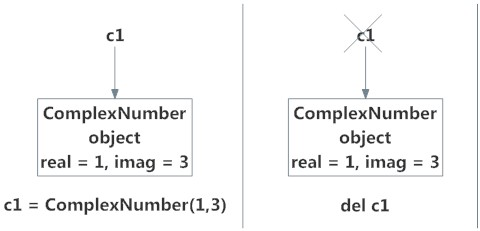

### What is Inheritence

Inheritence is powerful feature in OOP. It refers to definig a new class with little or now modification to the existing class. 

The new class is called 'derived or child class' and the class from which it inherits is calld 'base or parent class'

In [14]:
# polygon is closed figure with 3 or more sides

class polygon:
    def __init__(self, no_of_sides):
        self.n = no_of_sides
        self.sides = [0 for i in range(no_of_sides)]
        
    def inputSides(self):
        self.sides = [float(input("Enter the side"+str(i+1)+":")) for i in range(self.n)]
        
    
    def dispSides(self):
        for i in range(self.n):
            print("side", i+1, "is", self.sides[i])

Triangle is a polygon with 3 sides. So, we can create a class called Triange which inherits from polygon. This makes all the attributes available in class polygon readily available in Triangle. We dont need to define them again.

In [21]:
class Triange(polygon):
    def __init__(self):
        polygon.__init__(self,3)
    
    def findArea(self):
        a,b,c = self.sides
        # calculate semi-perimeter
        s = (a+b+c)/2
        area = (s*(s-a)*(s-2)*(s-c))**0.5
        print("The area of the triangel is %0.2f"%area)
    

In [23]:
t = Triange()
t.inputSides()

Enter the side1:10
Enter the side2:10
Enter the side3:01


In [24]:
t.dispSides()

side 1 is 10.0
side 2 is 10.0
side 3 is 1.0


In [25]:
t.findArea()

The area of the triangel is 20.59


We can see that, eventhough we did not define methods like inputSides(), dispSides() for class Triangle, we are able to use them.

### End of Basics

Till now we completed the basics necessary to create the custom pipelines using scikit-learn. Now we know what are "base classes", Base classes are classes from which we inherit methods and variables into child class, Similarly scikit-learn provides us with two base classes **TransformerMixin and BaseEstimator**.

https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65